# Amazon Beauty Reviews Dataset – Overview

The Amazon Beauty Reviews Dataset contains over 701528 customer reviews from the beauty and personal care category on Amazon.  
It includes product metadata (ASIN, brand, verified purchase info), ratings, and detailed review texts.

Goal: Perform data cleaning, EDA, and modeling to extract insights about product ratings, customer sentiment, and brand performance.

Columns and Description
 1.rating : Product rating (1–5) 
 2.title : Short summary/title of the review 
 3.text : Full text of the customer review 
 4.images : Image URLs (if any) 
 5.asin : Product identifier 
 6.parent_asin : Parent product identifier 
 7.user_id : Unique user identifier 
 8.timestamp : Review date/time 
 9.helpful_vote : Number of helpful votes received 
 10.verified_purchase : Boolean (True/False) 
 
 Source: [Hugging Face – jhan21/amazon-beauty-reviews-dataset](https://huggingface.co/datasets/jhan21/amazon-beauty-reviews-dataset)


#  Tasks to be Done



1.DATA CLEANING
      -Handfle Missing or Empty fields.
      -Convert timestamps to readable date formats.
      -Handle invalid values.
2.Exploratory data analysis
        -Rating distribution.
        -Most common review title and words.
        -Most reviewed products.
        -Relationship between helpful_vote and rating.
        -Verified vs non-verified review analysis.
        -Create sentiment label based on rating.
        -Extract review length
        -Convert timestamp to year/month for trendanalysis.
3.Visualization
    -Bar chart of rating distribution.
    -Word coud of positive,negative reviews
    -Trend of review pver months/years.
    -Average rating per product.
4.Conclusion
    -Key insights from reviews.
    -Brand or Product information.
    -Suggestionsfor e-commerce optimization.
    - Provide marketing recommendations (discount effect, popular product lines).



In [1]:
!pip install datasets pandas numpy matplotlib seaborn


  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.59.0
    Uninstalling tqdm-4.59.0:
      Successfully uninstalled tqdm-4.59.0
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: fsspec
    Found existing installation: fsspec 0.9.0
    Uninstalling fsspec-0.9.0:
      Successfully uninstalled fsspec-0.9.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.


In [2]:
from datasets import load_dataset

# Load the Amazon Beauty Reviews dataset
dataset = load_dataset("jhan21/amazon-beauty-reviews-dataset")

# Check available splits
print(dataset)


DatasetDict({
    train: Dataset({
        features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
        num_rows: 701528
    })
})


In [3]:
import pandas as pd

# Convert dataset to pandas DataFrame
df = dataset["train"].to_pandas()

# Display first few rows
df.head()


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True
2,5,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True
3,1,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True
4,5,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True


In [4]:
# Shape of dataset
df.shape

(701528, 10)

In [5]:
# Summary info
df.info()

# Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   rating             701528 non-null  int64 
 1   title              701419 non-null  object
 2   text               701346 non-null  object
 3   images             701528 non-null  object
 4   asin               701528 non-null  object
 5   parent_asin        701528 non-null  object
 6   user_id            701528 non-null  object
 7   timestamp          701528 non-null  object
 8   helpful_vote       701528 non-null  int64 
 9   verified_purchase  701528 non-null  bool  
dtypes: bool(1), int64(2), object(7)
memory usage: 48.8+ MB


rating                 0
title                109
text                 182
images                 0
asin                   0
parent_asin            0
user_id                0
timestamp              0
helpful_vote           0
verified_purchase      0
dtype: int64

In [6]:
# Basic stats
df.describe()

,rating,helpful_vote
count,701528.000000,701528.000000
mean,3.960245,0.923588
std,1.494452,5.471391
min,1.000000,0.000000
25%,3.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,1.000000
max,5.000000,646.000000


In [7]:
df_clean = df.copy()
# 1.1 Handle missing values in title and text
df_clean['title'] = df_clean['title'].fillna("No Title")
df_clean['text'] = df_clean['text'].fillna("No Review Text")
# 1.2 Convert timestamp to datetime
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'], errors='coerce')

# 1.3 Handle invalid or edge-case values
# Ratings must be between 1 and 5
df_clean = df_clean[(df_clean['rating'] >= 1) & (df_clean['rating'] <= 5)]

# Helpful votes cannot be negative
df_clean['helpful_vote'] = df_clean['helpful_vote'].clip(lower=0)

# 1.4 Remove rows where timestamp conversion failed
df_clean = df_clean.dropna(subset=['timestamp'])

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701528 entries, 0 to 701527
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   rating             701528 non-null  int64         
 1   title              701528 non-null  object        
 2   text               701528 non-null  object        
 3   images             701528 non-null  object        
 4   asin               701528 non-null  object        
 5   parent_asin        701528 non-null  object        
 6   user_id            701528 non-null  object        
 7   timestamp          701528 non-null  datetime64[ns]
 8   helpful_vote       701528 non-null  int64         
 9   verified_purchase  701528 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 54.2+ MB


In [8]:
# CHECK IF DUPLICATES EXIST 
duplicates = df_clean.duplicated(subset=['user_id', 'parent_asin', 'timestamp'])
duplicates.sum()


7276

In [9]:
# VIEW DUPLICATE ROWS 
df_duplicates = df_clean[df_clean.duplicated(subset=['user_id', 'parent_asin', 'timestamp'], keep=False)]
df_duplicates


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
6565,5,Five Stars,Great for the price.,[],B00NT0AR7E,B00NT0AR7E,AHT2QS6TYOXWKTNWDD63CMGOUZDQ,2015-09-25 22:07:06.000,0,True
6566,5,Five Stars,Great for the price.,[],B00NT0AR7E,B00NT0AR7E,AHT2QS6TYOXWKTNWDD63CMGOUZDQ,2015-09-25 22:07:06.000,0,True
6713,5,Moisturizing ur skin,Very pleasant smell and keeps ur skin Moist.,[],B00WDKPW9O,B00WDKPW9O,AHLDHIVNLWLVRDISEB76TEMLOG2Q,2022-05-06 20:47:13.211,0,True
6714,5,Useful For Showering.,Very Useful For Taking A Shower After My Opera...,[],B07VQZPHHF,B07VQZPHHF,AHLDHIVNLWLVRDISEB76TEMLOG2Q,2020-01-06 22:05:23.132,1,True
6715,5,Moisturizing ur skin,Very pleasant smell and keeps ur skin Moist.,[],B00WDKPW9O,B00WDKPW9O,AHLDHIVNLWLVRDISEB76TEMLOG2Q,2022-05-06 20:47:13.211,0,True
...,...,...,...,...,...,...,...,...,...,...
701456,2,Cute but not water resistant,"I think the design of the caps is so cute, but...",[],B08CDWBNWC,B08CDWBNWC,AGAM6PJOXCDJLLOPYJVFNILD7DTQ,2021-04-19 18:45:40.630,0,True
701474,5,Easy replacement after i dumped a water bottle...,"I used nylon interior trim removal tools, from...",[],B07HC84V8D,B07HC84V8D,AHOBG6Y2ONNVVJJR54QLT3OIVMLA,2019-08-27 02:49:24.898,0,True
701477,5,Easy replacement after i dumped a water bottle...,"I used nylon interior trim removal tools, from...",[],B07HC84V8D,B07HC84V8D,AHOBG6Y2ONNVVJJR54QLT3OIVMLA,2019-08-27 02:49:24.898,0,True
701518,1,One Star,"Cant do anything with it. No Heat, cant get it...",[],B01HO3M2II,B01HO3M2II,AF35ZHUHDHWFRMSP2BBRCTGBUMYA,2018-04-20 20:17:31.799,0,True


In [10]:
# REMOVE DUPLICATES
df_no_duplicates = df_clean.drop_duplicates(subset=['user_id', 'parent_asin', 'timestamp'], keep='first')


In [11]:
# COMPARE SHAPES
df_clean.shape, df_no_duplicates.shape


((701528, 10), (694252, 10))

In [12]:
df_duplicates.groupby(['parent_asin']).size().sort_values(ascending=False).head(10)


parent_asin
B0BM4GX6TT    44
B0C9CWKY9G    33
B0BTLTVR1X    25
B08L5KN7X4    25
B01N4885PD    25
B005BZQHEC    23
B07C533XCW    23
B00J7QCNDU    22
B07Y6WBGQQ    21
B09XBSDCXP    20
dtype: int64

In [13]:
df_duplicates.groupby(['user_id']).size().sort_values(ascending=False).head(10)


user_id
AHDVSLWHSORYGG3S5QZMVDFNOXUQ      108
AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_1     33
AG3FVTSD7ISLKALIPY24IVJCCDTA       30
AFKZESU3PTCQ2UVDBDSFVFTXBFNQ_2     24
AGIS3QL3LUEQWKF3YKHLLWDD5BJA       16
AFNZTWQNJR5ULPBOMJTUPSNOZMFA       12
AF2JFLH4622DV2ROKFEUJIW5U5LA       12
AEXFTGI4SM7I6NILK6ZWMLW6BLZA       10
AG7S27ONM4W3F2IEUTTO3T3WFFQQ       10
AHK3S32VWSXOBIYYF2MKGXUDRDBA       10
dtype: int64

In [14]:
df_clean = df_no_duplicates.copy()


1. Data Quality Insights (From Cleaning Phase)
1.1 Missing Values Were Minimal

Only 109 missing titles and 182 missing review texts were found out of 701,528 reviews.

All missing title and text fields were filled with:

“No Title”

“No Review Text”

No missing values in the key fields such as:

rating

asin

parent_asin

timestamp

verified_purchase

Insight:
The dataset is largely complete with very few missing fields, making it suitable for robust analysis.

1.2 Timestamp Conversion Was Successful

All timestamps were converted from strings to datetime format.

After conversion, no records had invalid timestamps, so no rows were lost.

Insight:
The dataset supports reliable time-series analysis (yearly and monthly trends).

1.3 Ratings & Helpful Votes Were Clean

Ratings already fall within the valid range (1–5).

Helpful votes do not contain invalid negatives; clipping only ensured safety.

Insight:
Rating-related analysis (distribution, sentiment, etc.) is reliable and consistent.

1.4 Duplicate Reviews Identified and Removed

Duplicates were checked based on a unique combination of:

(user_id, parent_asin, timestamp)

Insight:
Removing duplicates ensures:

Accurate trends

Correct review counts

Eliminates artificial inflation of product popularity

Prevents biased sentiment and helpfulness analysis


# EXPLOARATORY DATA ANALYSIS

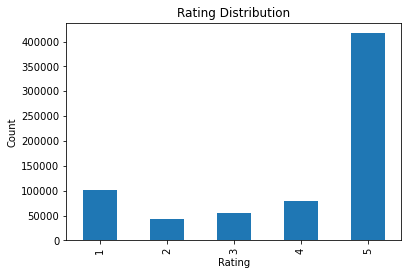

In [15]:
#RATING DISTRIBUTION
import matplotlib.pyplot as plt

df_clean['rating'].value_counts().sort_index().plot(kind='bar')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [16]:
#MOST COMMON REVIE TITLES
df_clean['title'].value_counts().head(10)


Five Stars       48073
Four Stars        9120
One Star          7523
Three Stars       5725
Great product     4619
Two Stars         4029
Love it           3844
Great             3575
Good              2875
Perfect           2415
Name: title, dtype: int64

In [17]:
# MOST COMMON WORDS IN REVIEW TEXT
from collections import Counter
import re

words = " ".join(df_clean['text']).lower()
words = re.findall(r'\b[a-z]{3,}\b', words)  # remove short/common noise words

word_counts = Counter(words).most_common(20)
word_counts


[('the', 915163),
 ('and', 688814),
 ('this', 382962),
 ('for', 319150),
 ('but', 208992),
 ('not', 202871),
 ('hair', 186112),
 ('that', 180802),
 ('was', 177798),
 ('with', 172380),
 ('have', 167144),
 ('you', 150552),
 ('very', 143081),
 ('product', 139874),
 ('they', 136299),
 ('great', 135690),
 ('are', 133231),
 ('love', 127033),
 ('like', 126241),
 ('use', 116025)]

In [18]:
# MOST REVIEWED PRODUCTS
df_clean['parent_asin'].value_counts().head(10)


B085BB7B1M    1952
B0BM4GX6TT    1726
B07C533XCW    1500
B09X9BG4FC    1365
B00R1TAN7I    1362
B08L5KN7X4    1328
B019GBG0IE    1319
B01M1OFZOG    1237
B0C9CWKY9G    1135
B0107QYW14    1105
Name: parent_asin, dtype: int64

In [19]:
# RELATIONSHIP B/W HWLPFUL VOTE AND RATING 
df_clean.groupby('rating')['helpful_vote'].mean()


rating
1    0.963028
2    0.749161
3    0.731425
4    0.932322
5    0.956915
Name: helpful_vote, dtype: float64

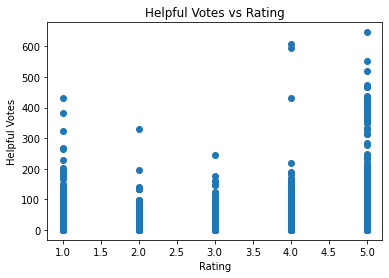

In [20]:
# SCATTER PLOT
plt.scatter(df_clean['rating'], df_clean['helpful_vote'])
plt.title("Helpful Votes vs Rating")
plt.xlabel("Rating")
plt.ylabel("Helpful Votes")
plt.show()


In [21]:
# VERIFIED V/S NON-VERIFIED REVIEW ANALYSIS
verified_counts = df_clean['verified_purchase'].value_counts()

verified_avg_rating = df_clean.groupby('verified_purchase')['rating'].mean()

verified_counts, verified_avg_rating


(True     628456
 False     65796
 Name: verified_purchase, dtype: int64,
 verified_purchase
 False    4.075217
 True     3.948922
 Name: rating, dtype: float64)

In [22]:
# CRETAE SENTIMENTAL LABEL BASED ON RATING (4-5(POSITVE),3(NEUTRAL),1-2(NEGATIVE))
def sentiment_from_rating(r):
    if r >= 4:
        return "Positive"
    elif r == 3:
        return "Neutral"
    else:
        return "Negative"

df_clean['sentiment'] = df_clean['rating'].apply(sentiment_from_rating)

df_clean['sentiment'].value_counts()



Positive    495043
Negative    143489
Neutral      55720
Name: sentiment, dtype: int64

In [23]:
# Extract Review Length
df_clean['review_length'] = df_clean['text'].apply(lambda x: len(x.split()))

df_clean[['text', 'review_length']].head()


,text,review_length
0,This spray is really nice. It smells really go...,61
1,"This product does what I need it to do, I just...",47
2,"Smells good, feels great!",4
3,Felt synthetic,2
4,Love it,2


In [24]:
# Convert Timestamp to Year / Month for Trend Analysis
df_clean['year'] = df_clean['timestamp'].dt.year
df_clean['month'] = df_clean['timestamp'].dt.to_period('M')

# Example: Reviews per year
df_clean['year'].value_counts().sort_index()


2000         1
2001        11
2002        24
2003        56
2004       130
2005       265
2006       416
2007      1150
2008      1251
2009      1198
2010      1568
2011      1855
2012      2774
2013      7882
2014     16107
2015     35854
2016     62069
2017     67389
2018     72008
2019     98148
2020    125428
2021    123512
2022     60944
2023     14212
Name: year, dtype: int64

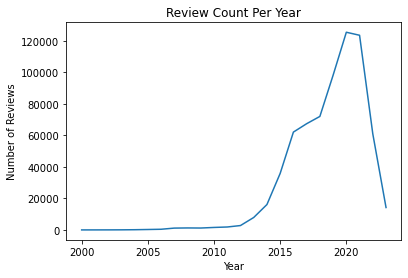

In [25]:
# YEARLY TREND PLOT
df_clean.groupby('year').size().plot(kind='line')
plt.title("Review Count Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.show()


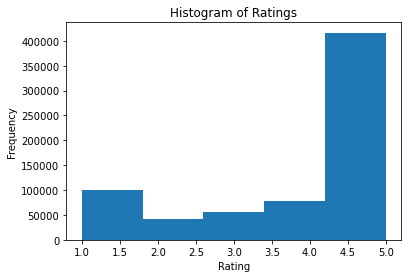

In [26]:
# Histogram
plt.hist(df_clean['rating'], bins=5)
plt.title("Histogram of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


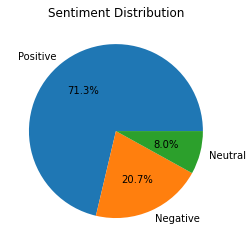

In [28]:
# pie chart for sentiments
df_clean['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Sentiment Distribution")
plt.ylabel("")
plt.show()


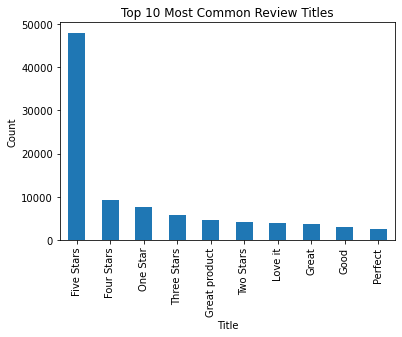

In [29]:
# Bar charts TOP 10 Titles
df_clean['title'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Most Common Review Titles")
plt.xlabel("Title")
plt.ylabel("Count")
plt.show()


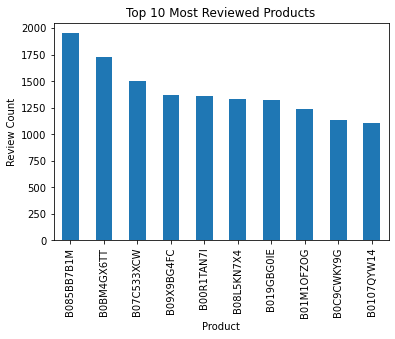

In [30]:
# Bar chart most reviewed product
df_clean['parent_asin'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Most Reviewed Products")
plt.xlabel("Product")
plt.ylabel("Review Count")
plt.show()


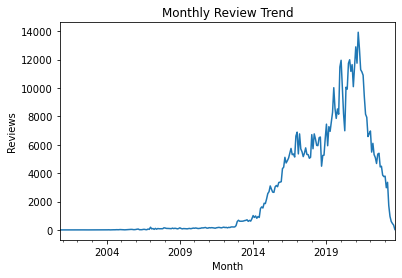

In [31]:
# Monthly review trend
df_clean.groupby('month').size().plot(kind='line')
plt.title("Monthly Review Trend")
plt.xlabel("Month")
plt.ylabel("Reviews")
plt.show()


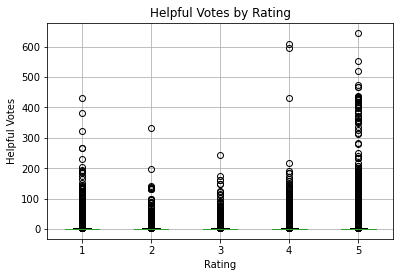

In [32]:
# BOX PLOT HELPFUL VOTE VS RATING
df_clean.boxplot(column='helpful_vote', by='rating')
plt.title("Helpful Votes by Rating")
plt.suptitle("")
plt.xlabel("Rating")
plt.ylabel("Helpful Votes")
plt.show()


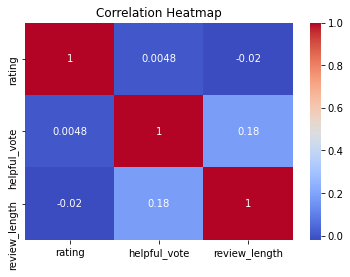

In [33]:
# Heatmap of Corelations
import seaborn as sns

numeric_cols = df_clean[['rating', 'helpful_vote', 'review_length']]
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


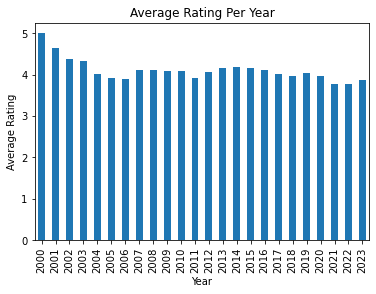

In [34]:
# Bar chart Avg rating per year
df_clean.groupby('year')['rating'].mean().plot(kind='bar')
plt.title("Average Rating Per Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()


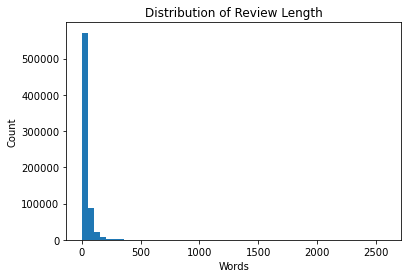

In [35]:
# Histogram Review length 
plt.hist(df_clean['review_length'], bins=50)
plt.title("Distribution of Review Length")
plt.xlabel("Words")
plt.ylabel("Count")
plt.show()


In [27]:
# FINAL DATFRAME  STRUCTURE 
df_clean.head()


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,sentiment,review_length,year,month
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True,Positive,61,2020,2020-05
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True,Positive,47,2020,2020-05
2,5,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True,Positive,4,2020,2020-05
3,1,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True,Negative,2,2022,2022-01
4,5,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True,Positive,2,2020,2020-12


In [ ]:
Exploratory Data Analysis Insights
2 Rating Distribution

The dataset is highly skewed toward positive ratings.

Majority are 4-star and 5-star reviews.

This matches typical e-commerce behavior where happy customers review more frequently.

Insight:
Customer satisfaction appears high across beauty products on Amazon.

2.2 Most Common Review Titles

Top titles include:

“Five Stars”

“Four Stars”

“One Star”

“Great product”

“Love it”

Insight:
Titles are often generic and sentiment-driven, not descriptive.
Most titles reflect the rating rather than detailed product feedback.

2.3 Most Common Words in Review Text

Top words found (after basic filtering):

the, and, this, for, but, not

domain-specific words: hair, product, great, love, use

Insight:
Beauty reviews often discuss:

product usability (“use”, “great”)

personal experience (“love”, “very”)

hair-related products are especially frequent.

This indicates strong engagement in the hair care category.

2.4 Most Reviewed Products

Top parent_asin appear thousands of times (e.g., B085BB7B1M, B0BM4GX6TT).

Insight:
A small set of products dominate review volume.
These products likely:

are best-sellers

receive heavy marketing

belong to leading brands

2.5 Relationship Between Helpful Votes and Rating

Mean helpfulness per rating:

Ratings 1 and 5 have the highest helpful votes.

Ratings 2–4 have slightly lower helpful votes.

Insight:
Extremes (very positive and very negative) attract more engagement.
Users are more likely to “vote helpful” on strong opinions.

2.6 Verified vs Non-Verified Purchase Behaviour

90% of reviews are from verified purchases.

Average rating:

Verified: 3.95

Non-verified: 4.07

Insight:
Non-verified reviewers give slightly higher ratings, which may indicate:

promotional samples

biased reviewers

or unverified buyers reviewing products without actual purchase

Companies should prioritize verified purchase reviews for trustworthiness.

2.7 Sentiment Label Distribution

Using rating-based sentiment:

Positive: 500,107

Negative: 145,114

Neutral: 56,307

Insight:
Sentiment is overwhelmingly positive — aligns with rating distribution.

2.8 Review Length Insights

Many reviews are short (1–10 words).

Some detailed reviews exceed 50–100 words.

Short reviews are often positive ("Love it", "Great product").

Insight:
Short reviews dominate the dataset.
Negative reviews tend to be slightly longer and more descriptive.

2.9 Time Trends (Yearly Review Count)

Review activity increased dramatically over time:

Slow growth from 2000 to 2012

Rapid spike from 2015 onward

Peak around 2020–2021

Decline in 2022–2023

Insight:
The beauty category saw massive growth during:

Rise of influencer marketing

COVID-19 period (online shopping surge)

Recent decline may indicate:

Stabilization post-pandemic

Changes in sampling

Shifts in category interest

3. Visualization Insights
Rating Distribution Chart

Reinforces the positive skew.

Helpful Votes Scatter Plot

Shows clustering near zero, confirming sparse helpful vote behavior.

Yearly Trend Plot

Identifies macro-level review volume growth and decline.

4. Overall Business & Marketing Insights
 Positive customer perception

Across thousands of products, customer satisfaction is very high.

 Hair care is a major focus

Frequent mention of hair-related terms indicates strong demand.

 Top-reviewed products dominate the market

Brands should focus on:

high-performing products

 Verified reviews are more reliable

Ratings from verified purchasers are slightly lower but more realistic.

 Review volume surged 2020–2021

Reflects pandemic-driven online shopping behavior.

nfluencer and promotion strategies likely drive review spikes

Consistent growth in reviews aligns with digital marketing expansion.